# Predict Bike Rentals

This project uses a data set from the university of Caalifornia's website on bike rentals

the columns are as follows: 

    instant - A unique sequential ID number for each row
    dteday - The date of the rentals
    season - The season in which the rentals occurred
    yr - The year the rentals occurred
    mnth - The month the rentals occurred
    hr - The hour the rentals occurred
    holiday - Whether or not the day was a holiday
    weekday - The day of the week (as a number, 0 to 7)
    workingday - Whether or not the day was a working day
    weathersit - The weather (as a categorical variable)
    temp - The temperature, on a 0-1 scale
    atemp - The adjusted temperature
    hum - The humidity, on a 0-1 scale
    windspeed - The wind speed, on a 0-1 scale
    casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
    registered - The number of registered riders (people who had already signed up)
    cnt - The total number of bike rentals (casual + registered)
    
I will be predicting the cnt (count) column using other columns saved for casual and registered. 

In [1]:
#read in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
#read the data
bikes = pd.read_csv('bike_rental_hour.csv')

In [3]:
# converts hours into time ranges
def assign_time_label(row):
    x = row['hr']
    if x > 6 and x <= 12:
        return 1
    elif x > 12 and x <= 18:
        return 2
    elif x > 18 and x <= 24:
        return 3
    else:
        return 4

In [4]:
bikes['time_label'] =  bikes.apply(lambda x: assign_time_label(x), axis=1)
bikes = bikes.drop('hr', axis = 1)

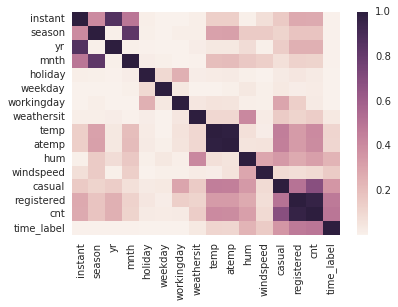

In [5]:
sns.heatmap(abs(bikes.corr()))

In [6]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [7]:
bikes['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

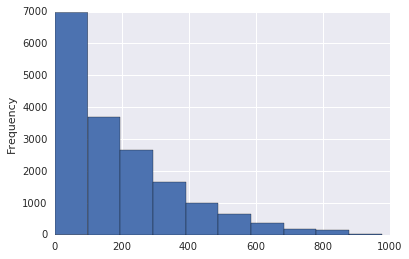

In [8]:
bikes['cnt'].plot.hist()

# Error Metric

Mean Squared Error will be used. the values are discrete and interval ratio. This error metric is pertinant to this type of data.

In [9]:
#segregate data into train and test
train = bikes.sample(frac=0.8)
test = bikes.loc[~bikes.index.isin(train.index)]

In [10]:
#feature selection
features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'yr',
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']
target = 'cnt'

Unused columns:
    
    instant - the unrelated numeric id
    dteday - date the rental occured
    casual - related to cnt
    registered - related to cnt
    cnt - value to be predicted

# Linear Regression

In [11]:
#generate model and fit
lr = LinearRegression()
lr.fit(train[features], train[target])

#predict
lr_predictions = lr.predict(test[features])
linear_mse = mean_squared_error(test[target], lr_predictions)
print(linear_mse)

18159.578654651046


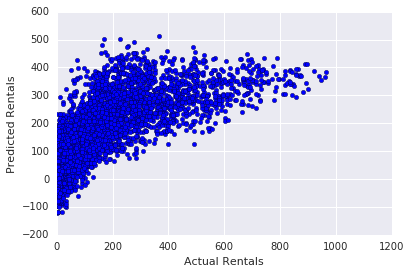

In [12]:
plt.scatter(x = test[target], y = lr_predictions)
plt.xlim(0, 1200)
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')

There is a high degree of error with the LinearRegressor model

# Decision Tree Regressor

In [13]:
dtr_mses = []
optimal_leaf = 0

for i in range(1,11):
    dtr = DecisionTreeRegressor(min_samples_leaf=i)
    dtr.fit(train[features], train[target])
    dtr_predictions = dtr.predict(test[features])
    i_mse = mean_squared_error(test[target], dtr_predictions)
    dtr_mses.append(i_mse)
    print(i, ": ", i_mse, sep="")
    if i_mse == min(dtr_mses):
        optimal_leaf = i

1: 19201.970516078505
2: 17070.48328011124
3: 16246.576356120459
4: 14846.078030802079
5: 14651.431374514777
6: 14286.965662671893
7: 14026.202844625655
8: 13843.567189567932
9: 13579.537694947603
10: 13659.74748946109


In [14]:
dtr = DecisionTreeRegressor(min_samples_leaf=optimal_leaf)
dtr.fit(train[features], train[target])
dtr_predictions = dtr.predict(test[features])
dtr_mse = mean_squared_error(test[target], dtr_predictions)
print(dtr_mse)

13612.108227965018


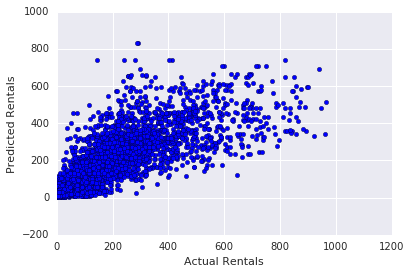

In [15]:
plt.scatter(x = test[target], y = dtr_predictions)
plt.xlim(0, 1200)
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')

Decision trees reduce the mean squared error versus the linear regression. 
this results in a tighter cluser of values 

# Random Forest

In [16]:
rf_mses = []
optimal_leaf = 0

for i in range(1,11):
    rf = RandomForestRegressor(min_samples_leaf=i)
    rf.fit(train[features], train[target])
    rf_predictions = rf.predict(test[features])
    i_mse = mean_squared_error(test[target], rf_predictions)
    rf_mses.append(i_mse)
    print(i, ": ", i_mse, sep="")
    if i_mse == min(rf_mses):
        optimal_leaf = i

1: 12150.124441200514
2: 11856.388891539304
3: 11616.512704103272
4: 11619.774905158241
5: 11536.907108231873
6: 11882.345342941595
7: 11549.732883228702
8: 11696.303338541364
9: 11471.269378051753
10: 11595.7902313309


In [17]:
rf = RandomForestRegressor(min_samples_leaf=optimal_leaf)
rf.fit(train[features], train[target])
rf_predictions = rf.predict(test[features])
rf_mse = mean_squared_error(test[target], rf_predictions)
print(rf_mse)

11508.68184175965


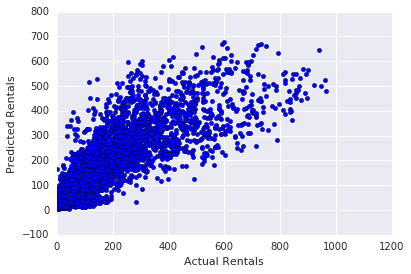

In [18]:
plt.scatter(x = test[target], y = rf_predictions)
plt.xlim(0, 1200)
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')

Random Forest produces the least error of the 3 methods.